In [2]:
pip install bwo

ERROR! Session/line number was not unique in database. History logging moved to new session 439
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\acer\AppData\Local\Programs\Python\Python37\python.exe -m pip install --upgrade pip' command.


In [3]:
pip install landscapes

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\acer\AppData\Local\Programs\Python\Python37\python.exe -m pip install --upgrade pip' command.


In [4]:
from bwo import minimize
from landscapes.single_objective import sphere
import numpy as np
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
from matplotlib import pyplot
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.cluster import KMeans
from sklearn.model_selection import KFold, cross_val_score, train_test_split
import os

In [5]:
n_estimator = np.arange(1, 16, 1).tolist()
#n_estimator = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

In [6]:
fbest, xbest = minimize(sphere , x0 = n_estimator, disp = True, maxiter = 3000)

> ITER:  1 | GBEST: 1177.813835
> ITER:  2 | GBEST: 1177.813835
> ITER:  3 | GBEST: 1163.019966
> ITER:  4 | GBEST: 1150.368976
> ITER:  5 | GBEST: 1147.789795
> ITER:  6 | GBEST: 1147.784484
> ITER:  7 | GBEST: 1147.784480
> ITER:  8 | GBEST: 1116.514861
> ITER:  9 | GBEST: 1108.913431
> ITER: 10 | GBEST: 1108.811996
> ITER: 11 | GBEST: 1108.811982
> ITER: 12 | GBEST: 1092.685657
> ITER: 13 | GBEST: 1092.281230
> ITER: 14 | GBEST: 1083.262168
> ITER: 15 | GBEST: 1033.485477
> ITER: 16 | GBEST: 1033.469420
> ITER: 17 | GBEST: 1017.025188
> ITER: 18 | GBEST: 1016.824493
> ITER: 19 | GBEST: 1016.723621
> ITER: 20 | GBEST: 1016.723594
> ITER: 21 | GBEST: 1016.723594
> ITER: 22 | GBEST: 1010.786091
> ITER: 23 | GBEST: 1009.873129
> ITER: 24 | GBEST: 1009.869761
> ITER: 25 | GBEST: 988.679687
> ITER: 26 | GBEST: 963.848845
> ITER: 27 | GBEST: 963.761033
> ITER: 28 | GBEST: 963.759343
> ITER: 29 | GBEST: 957.043640
> ITER: 30 | GBEST: 956.853158
> ITER: 31 | GBEST: 956.851336
> ITER: 32 | GB

In [7]:
fbest, xbest

(915.3638315263098,
 [7.811802316218078,
  7.81180231712244,
  7.811802316270832,
  7.8118023171659345,
  7.81180231439626,
  7.8118023176746725,
  7.811802317572075,
  7.811802316900323,
  7.811802316660213,
  7.811802315762042,
  7.811802315369157,
  7.811802319329516,
  7.811802316424268,
  7.811802317288537,
  7.8118023162379835])

In [8]:
df = pd.read_csv('D:\A_FYP\Dataset/GSE18842_clean.csv')

In [9]:
kmeans = KMeans(n_clusters=8) 
clusterk = kmeans.fit_predict(df)

c:\Users\acer\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"


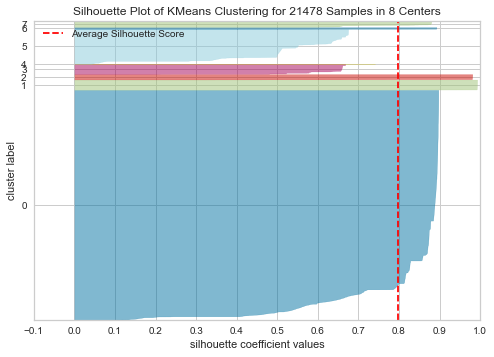

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 21478 Samples in 8 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [10]:
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.datasets import load_nfl
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick', figsize=(10, 30))
visualizer.fit(df) 
visualizer.show()

In [11]:
#get the number of features in each cluster
import numpy as np
# cluster assignments
labels = kmeans.labels_
# get the number of data in each cluster
cluster_counts = np.bincount(labels)
cluster_counts

array([16578,   732,   381,   723,     2,  2480,   148,   434],
      dtype=int64)

In [12]:
# Get the average silhouette score for each cluster
from sklearn.metrics import silhouette_samples, silhouette_score
silhouette_avg = silhouette_score(df, clusterk)
print("Average silhouette score:", silhouette_avg)

Average silhouette score: 0.7968991941161079


In [13]:
#sample_silhouette_values is the silhouette index for each features
sample_silhouette_values = silhouette_samples(df, clusterk)

In [14]:
# calculate the average silhouette score for each cluster
cluster_silhouette_avgs = []
for i in range(8):
    cluster_silhouette_avgs.append(
        np.mean(sample_silhouette_values[clusterk == i])
    )

# print the average silhouette score for each cluster
for i, avg_score in enumerate(cluster_silhouette_avgs):
    print(f"Cluster {i}: {avg_score}")

Cluster 0: 0.833583602398675
Cluster 1: 0.9848701864525966
Cluster 2: 0.9604018878921219
Cluster 3: 0.6198555870371638
Cluster 4: 0.6953127758109545
Cluster 5: 0.5210030441289227
Cluster 6: 0.8390554505993756
Cluster 7: 0.7926264142451641


In [15]:
best_cluster = clusterk[sample_silhouette_values.argmax()]

In [16]:
# Extract the data points in the best cluster
best_cluster_data = df[clusterk == best_cluster]
print("Best_cluster_data", best_cluster_data)

Best_cluster_data               ID  GSM466947  GSM466948  GSM466949  GSM466950  GSM466951  \
820    101929344  -1.146488  -1.166816  -1.073343  -1.157032  -1.214337   
1150   101929497  -1.221755  -1.213041  -1.186531  -1.249092  -1.205889   
1183   101929134  -0.931707  -0.732300  -0.849744  -0.806446  -0.826005   
1534   101927746  -0.909729  -1.175571  -0.966221  -1.233046  -1.222978   
1536   101927129  -1.066712  -0.996217  -0.958408  -1.054060  -1.002240   
...          ...        ...        ...        ...        ...        ...   
21433  101927651  -0.897225  -0.866489  -0.837657  -0.871481  -0.831266   
21439  101927081  -1.126129  -1.212387  -0.982971  -1.151822  -1.183356   
21455  101929715  -0.789981  -0.930243  -0.832460  -0.854767  -0.901066   
21461  101929660  -1.117092  -1.186077  -1.140612  -1.183269  -1.355357   
21470  101929475  -0.846063  -0.979980  -0.879354  -0.868431  -0.766164   

       GSM466952  GSM466953  GSM466954  GSM466955  ...  GSM467028  GSM467029  \
8

In [17]:
print("Best_cluster", best_cluster)

Best_cluster 1


In [18]:
#extract all data except the data within the best_cluster
other_clusters_data = df[clusterk != best_cluster]
print("Other cluster: ", other_clusters_data)

Other cluster:                ID  GSM466947  GSM466948  GSM466949  GSM466950  GSM466951  \
0            780   2.661339   1.867785   2.679133   1.820000   1.994858   
1           5982   1.418633   0.734274   1.604150   0.938962   0.694760   
2           3310   0.425047   0.640104   1.971449   1.122209   1.354774   
3           7849  -0.515104  -0.511619  -0.408930  -0.362612  -0.454379   
4           2978  -0.761460  -0.714078  -0.647764  -0.750291  -0.868130   
...          ...        ...        ...        ...        ...        ...   
21473       8484   0.167658   0.111689   0.350986  -0.028003  -0.113460   
21474  100532736   2.263622   2.157434   1.158082   1.822705   2.602346   
21475  100527960   0.788202   0.786731   1.333859   1.037851   1.000177   
21476  100287013   0.459810   0.171876   0.339855   0.628317   0.350900   
21477  100505915  -0.648253  -0.524218  -0.558079  -0.601228  -0.555844   

       GSM466952  GSM466953  GSM466954  GSM466955  ...  GSM467028  GSM467029  \
0  

In [19]:
best_cluster = best_cluster_data.T
best_cluster

,820,1150,1183,1534,1536,1630,1888,2020,2021,2045,...,21395,21413,21415,21416,21420,21433,21439,21455,21461,21470
ID,1.019293e+08,1.019295e+08,1.019291e+08,1.019277e+08,1.019271e+08,1.019288e+08,1.019278e+08,1.019272e+08,1.019285e+08,1.019280e+08,...,1.019295e+08,1.019275e+08,1.019284e+08,1.019286e+08,1.019277e+08,1.019277e+08,1.019271e+08,1.019297e+08,1.019297e+08,1.019295e+08
GSM466947,-1.146488e+00,-1.221755e+00,-9.317074e-01,-9.097294e-01,-1.066712e+00,-1.093698e+00,-9.007070e-01,-5.340659e-01,-9.944021e-01,-1.278323e+00,...,6.557995e-03,-4.749010e-01,-1.116042e+00,9.402122e-02,-1.108191e+00,-8.972252e-01,-1.126129e+00,-7.899815e-01,-1.117092e+00,-8.460633e-01
GSM466948,-1.166816e+00,-1.213041e+00,-7.322998e-01,-1.175571e+00,-9.962168e-01,-1.175259e+00,-8.256802e-01,-2.236233e-01,-8.417434e-01,-1.316756e+00,...,-1.169446e-01,-5.022954e-01,-6.429673e-01,-1.137395e-01,-1.153729e+00,-8.664885e-01,-1.212387e+00,-9.302432e-01,-1.186077e+00,-9.799800e-01
GSM466949,-1.073343e+00,-1.186531e+00,-8.497439e-01,-9.662206e-01,-9.584083e-01,-1.173231e+00,-8.278939e-01,-7.014899e-01,-5.070248e-01,-1.241080e+00,...,-3.123788e-02,-5.114989e-01,-1.158254e+00,-6.520238e-02,-1.258090e+00,-8.376567e-01,-9.829712e-01,-8.324602e-01,-1.140612e+00,-8.793538e-01
GSM466950,-1.157032e+00,-1.249092e+00,-8.064461e-01,-1.233046e+00,-1.054060e+00,-1.078379e+00,-9.200327e-01,-1.003059e-01,3.241995e-01,-1.304577e+00,...,-1.372097e-01,-4.785194e-01,-6.034421e-01,1.410280e-01,-1.149704e+00,-8.714812e-01,-1.151822e+00,-8.547671e-01,-1.183269e+00,-8.684312e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM467033,-1.184055e+00,-1.151098e+00,-7.901983e-01,-1.143415e+00,-9.946800e-01,-1.111019e+00,-9.014934e-01,-2.778587e-01,-1.367969e+00,-1.310317e+00,...,-1.911092e-01,-4.885998e-01,-3.525256e-01,-2.383786e-01,-1.261160e+00,-1.019038e+00,-1.208755e+00,-8.833645e-01,-1.267082e+00,-9.616801e-01
GSM467034,-1.150641e+00,-1.101857e+00,-4.959883e-01,-1.129793e+00,-1.063122e+00,-1.192158e+00,-8.908050e-01,-9.526010e-01,-1.203611e+00,-1.206671e+00,...,-1.461151e-01,-3.380267e-01,-1.010581e+00,6.787853e-02,-1.134888e+00,-8.982572e-01,-1.044331e+00,-8.117617e-01,-1.178393e+00,-8.892865e-01
GSM467035,-1.167999e+00,-1.210009e+00,-8.597993e-01,-1.129592e+00,-1.103315e+00,-1.133346e+00,-9.290322e-01,-1.795112e-01,-7.226757e-01,-1.264719e+00,...,-2.286375e-01,-5.265269e-01,-7.506289e-01,-1.672309e-01,-1.189960e+00,-8.346640e-01,-1.006518e+00,-8.260673e-01,-1.253575e+00,-1.013158e+00
GSM467036,-1.084220e+00,-1.067424e+00,-7.180298e-01,-1.209023e+00,-1.031054e+00,-1.108321e+00,-5.923712e-01,-7.685049e-01,-1.018252e+00,-1.198308e+00,...,-2.026195e-01,-5.300849e-01,-1.160275e+00,-3.200572e-01,-1.248403e+00,-6.915263e-01,-1.177922e+00,-7.491362e-01,-1.228118e+00,-8.547198e-01


In [20]:
other_clusters = other_clusters_data
other_clusters

,ID,GSM466947,GSM466948,GSM466949,GSM466950,GSM466951,GSM466952,GSM466953,GSM466954,GSM466955,...,GSM467028,GSM467029,GSM467030,GSM467031,GSM467032,GSM467033,GSM467034,GSM467035,GSM467036,GSM467037
0,780,2.661339,1.867785,2.679133,1.820000,1.994858,2.803317,2.091761,2.106924,1.811042,...,2.944553,2.902100,2.505667,2.042315,2.441024,1.939424,2.604855,2.050474,2.548561,1.251609
1,5982,1.418633,0.734274,1.604150,0.938962,0.694760,1.274562,0.580748,0.985890,0.803777,...,1.605141,1.362722,0.887973,0.745635,1.220377,0.612408,1.434570,0.690984,0.931668,0.793546
2,3310,0.425047,0.640104,1.971449,1.122209,1.354774,0.136413,2.085748,1.975706,1.573339,...,1.565087,1.095913,0.551110,1.353915,0.635838,2.348068,0.679576,1.551366,0.499677,1.705203
3,7849,-0.515104,-0.511619,-0.408930,-0.362612,-0.454379,-0.433361,-0.505890,-0.475059,-0.386920,...,-0.362322,-0.426781,-0.381976,-0.390438,-0.442297,-0.361791,-0.375396,-0.409135,-0.211460,-0.353426
4,2978,-0.761460,-0.714078,-0.647764,-0.750291,-0.868130,-0.635384,-0.803985,-0.575347,-0.745985,...,-0.414429,-0.632602,-0.651786,-0.668461,-0.748122,-0.791222,-0.696493,-0.816798,-0.622234,-0.717330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21473,8484,0.167658,0.111689,0.350986,-0.028003,-0.113460,0.311009,-0.017528,0.240170,-0.016184,...,0.066423,-0.069239,0.370347,0.127218,-0.062074,0.014552,0.024878,-0.054234,0.217193,0.007507
21474,100532736,2.263622,2.157434,1.158082,1.822705,2.602346,1.402133,2.349209,2.099105,2.264477,...,2.139715,2.108516,2.189630,2.292915,1.670223,2.294747,2.048775,2.393509,1.372941,2.702002
21475,100527960,0.788202,0.786731,1.333859,1.037851,1.000177,0.793411,0.849166,0.634948,0.769013,...,1.008387,0.745614,1.014727,0.891310,0.927535,0.730552,0.924453,0.807436,0.335507,0.858819
21476,100287013,0.459810,0.171876,0.339855,0.628317,0.350900,0.817976,0.330789,0.423907,0.319511,...,0.375602,0.937037,0.570735,0.779503,0.925857,0.451877,0.650061,0.566351,-0.127859,0.345218


In [21]:
#best_cluster.to_csv('D:\A_FYP\Dataset/gse18842_bestCluster.csv', index=True)

In [22]:
#other_clusters.to_csv('D:\A_FYP\Dataset/gse18842_otherCluster.csv', index=True)

Random Forest Classification for Best cluster

In [23]:
  best_cluster = pd.read_csv('D:\A_FYP\Dataset/gse18842_bestCluster.csv', header=0)

In [24]:
best_cluster = best_cluster.iloc[:,1:]
best_cluster.head()

,101929344,101929497,101929134,101927746,101927129,101928751,101927774,101927221,101928492,101928001,...,101927546,101928370,101928617,101927659,101927651,101927081,101929715,101929660,101929475,class
0,-1.146488,-1.221755,-0.931707,-0.909729,-1.066712,-1.093698,-0.900707,-0.534066,-0.994402,-1.278323,...,-0.474901,-1.116042,0.094021,-1.108191,-0.897225,-1.126129,-0.789981,-1.117092,-0.846063,1
1,-1.166816,-1.213041,-0.732300,-1.175571,-0.996217,-1.175259,-0.825680,-0.223623,-0.841743,-1.316756,...,-0.502295,-0.642967,-0.113739,-1.153729,-0.866489,-1.212387,-0.930243,-1.186077,-0.979980,0
2,-1.073343,-1.186531,-0.849744,-0.966221,-0.958408,-1.173231,-0.827894,-0.701490,-0.507025,-1.241080,...,-0.511499,-1.158254,-0.065202,-1.258090,-0.837657,-0.982971,-0.832460,-1.140612,-0.879354,1
3,-1.157032,-1.249092,-0.806446,-1.233046,-1.054060,-1.078379,-0.920033,-0.100306,0.324199,-1.304577,...,-0.478519,-0.603442,0.141028,-1.149704,-0.871481,-1.151822,-0.854767,-1.183269,-0.868431,0
4,-1.214337,-1.205889,-0.826005,-1.222978,-1.002240,-1.178955,-0.859002,-0.470644,-1.132438,-1.304652,...,-0.231178,-0.942458,0.443815,-1.318417,-0.831266,-1.183356,-0.901066,-1.355357,-0.766164,1


In [25]:
best_target = best_cluster["class"]
best_predictor = best_cluster.drop("class", axis=1)

In [26]:
lrf_X_train,lrf_X_test,lrf_Y_train,lrf_Y_test = train_test_split(best_predictor,best_target,test_size=0.3)

In [47]:
print(lrf_X_train)

      160364     63979      1829     91057      1841     84296     54509  \
25 -0.683129 -0.190698  1.127193 -0.859902 -0.349031 -0.827299 -0.034775   
27 -0.576390 -0.243260  0.535596 -0.774752 -0.282464 -0.912796  0.091411   
41 -0.617694 -0.249712  0.698212 -0.514742 -0.292391 -0.910727 -0.163484   
67 -0.986100  1.382750  2.264103 -0.121950 -0.119995 -0.550292 -0.336130   
9  -1.040728  0.429623  1.814922 -0.125688  0.263281 -0.515872 -0.503021   
..       ...       ...       ...       ...       ...       ...       ...   
13 -1.042516  0.669846  2.023308 -0.024859  0.124404 -0.668810 -0.185770   
48 -0.648823 -0.522237  0.602411 -0.665238 -0.376645 -0.836244  0.004885   
10 -0.606081 -0.412736  0.993467 -0.798916 -0.467539 -0.962175 -0.041142   
62 -0.681201 -0.309502  0.963525 -0.840975 -0.388280 -0.938166 -0.101495   
38 -0.909492  0.586704  1.757112 -0.238235 -0.211086 -0.736682 -0.114638   

        2118     80014      2264  ...    147463  105373869    120892  \
25 -0.261494  0

In [48]:
print(lrf_X_test)

      160364     63979      1829     91057      1841     84296     54509  \
84 -0.618909 -0.222103  1.185564 -0.583417 -0.456554 -0.940402  0.045188   
83 -0.879574  0.335688  1.582136 -0.354512 -0.166314 -0.759006  0.184877   
77 -0.843820  0.217439  1.649400 -0.414946 -0.131188 -0.715184  0.027816   
31 -0.605103 -0.373408  0.293059 -0.649815 -0.165467 -0.867593  0.044183   
51 -0.874246  1.028233  1.909580  0.154928  0.019208 -0.466435  0.112461   
23 -0.558438 -0.501585  0.449860 -0.669959 -0.278659 -0.911227  0.051237   
40 -0.925139  0.593919  1.986637 -0.222365 -0.199514 -0.716093 -0.307580   
57 -0.956024  0.357300  1.898480 -0.160598 -0.047207 -0.790267 -0.277916   
60 -0.644925 -0.236502  0.935404 -0.764061 -0.369472 -0.897771 -0.029867   
85 -1.008663  0.652654  2.191319 -0.252198  0.223134 -0.629444 -0.043982   
19 -0.278945 -0.572378  0.863952 -0.685847 -0.376116 -0.897117 -0.050106   
5  -0.931117  0.767463  2.346008  0.165254 -0.103184 -0.419536 -0.144856   
72 -0.497406

In [49]:
print(lrf_Y_train)

25    0.0
27    0.0
41    0.0
67    1.0
9     1.0
     ... 
13    1.0
48    0.0
10    0.0
62    0.0
38    1.0
Name: class, Length: 63, dtype: float64


In [50]:
print(lrf_Y_test)

84    0.0
83    1.0
77    1.0
31    0.0
51    1.0
23    0.0
40    1.0
57    1.0
60    0.0
85    1.0
19    0.0
5     1.0
72    0.0
70    0.0
2     1.0
21    0.0
18    1.0
59    1.0
26    1.0
73    0.0
0     1.0
39    0.0
63    1.0
46    1.0
65    1.0
8     0.0
54    0.0
7     1.0
Name: class, dtype: float64


In [27]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.model_selection import KFold, cross_val_score, train_test_split

rf = RandomForestClassifier()
rf.fit(lrf_X_train, lrf_Y_train)
Y_pred_rf = rf.predict(lrf_X_test)
accuracy = round(accuracy_score(lrf_Y_test,Y_pred_rf)*100,2)
cm = metrics.confusion_matrix(lrf_Y_test, Y_pred_rf)

In [28]:
TP = cm[1][1]
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
conf_sensitivity = (TP / float(TP + FN))
conf_specificity = (TN / float(TN + FP))

sensivity =round(conf_sensitivity*100,2)
specificty = round(conf_specificity*100,2)

print("accuracy: ",accuracy)
print("sensivity: ", sensivity)
print("specificty: ", specificty)

accuracy:  100.0
sensivity:  100.0
specificty:  100.0


Random Forest Feature Selection for other cluster

In [29]:
other_cluster = pd.read_csv('D:\A_FYP\Dataset/gse18842_otherCluster.csv')
#havent transpose

c:\Users\acer\AppData\Local\Programs\Python\Python37\lib\site-packages\IPython\core\interactiveshell.py:3186: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [30]:
other_cluster = other_cluster.set_index('ID').T

In [31]:
other_cluster

ID,780,5982,3310,7849,2978,7318,7067,11099,6352,1571,...,105371226,105374888,389641,400499,8484,100532736,100527960,100287013,100505915,class
GSM466947,2.661339,1.418633,0.425047,-0.515104,-0.761460,0.491832,-0.193711,-0.610318,2.031513,-0.969532,...,-0.774621,-1.222731,-0.720901,0.177977,0.167658,2.263622,0.788202,0.459810,-0.648253,1.0
GSM466948,1.867785,0.734274,0.640104,-0.511619,-0.714078,1.425143,-0.190345,0.210718,2.351252,-0.802928,...,-0.661005,-1.161277,-0.708574,-0.017481,0.111689,2.157434,0.786731,0.171876,-0.524218,0.0
GSM466949,2.679133,1.604150,1.971449,-0.408930,-0.647764,0.289708,-0.314539,-0.727475,1.133344,-0.732971,...,-0.625923,-1.170810,-0.588770,0.111755,0.350986,1.158082,1.333859,0.339855,-0.558079,1.0
GSM466950,1.820000,0.938962,1.122209,-0.362612,-0.750291,1.395819,-0.259035,-0.110246,1.755202,-0.774711,...,-0.736608,-1.163966,-0.740747,0.087511,-0.028003,1.822705,1.037851,0.628317,-0.601228,0.0
GSM466951,1.994858,0.694760,1.354774,-0.454379,-0.868130,1.429914,-0.034334,-0.525991,2.614880,-0.640188,...,-0.653715,-1.184531,-0.764071,0.317931,-0.113460,2.602346,1.000177,0.350900,-0.555844,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM467033,1.939424,0.612408,2.348068,-0.361791,-0.791222,1.289184,-0.132086,0.131979,1.947819,-0.858831,...,-0.774957,-1.264058,-0.755242,0.102058,0.014552,2.294747,0.730552,0.451877,-0.600144,0.0
GSM467034,2.604855,1.434570,0.679576,-0.375396,-0.696493,0.978839,-0.115630,-0.173175,1.633844,-0.292675,...,-0.663580,-1.105788,-0.560197,-0.002713,0.024878,2.048775,0.924453,0.650061,-0.490089,1.0
GSM467035,2.050474,0.690984,1.551366,-0.409135,-0.816798,1.324168,-0.085639,0.120366,1.683367,-0.886778,...,-0.830228,-1.123159,-0.748777,-0.099662,-0.054234,2.393509,0.807436,0.566351,-0.409309,0.0
GSM467036,2.548561,0.931668,0.499677,-0.211460,-0.622234,0.649492,-0.135915,-0.604162,1.273621,-0.850319,...,-0.711523,-1.043769,-0.519568,0.222621,0.217193,1.372941,0.335507,-0.127859,-0.631278,1.0


In [32]:
#other_cluster.to_csv('D:\A_FYP\Dataset/gse18842_otherCluster_transposed.csv', index=True)

Random Forest Feature Selection for Other Cluster

In [33]:
other_cluster = pd.read_csv('D:\A_FYP\Dataset/gse18842_otherCluster_transposed.csv')
other_cluster

,Unnamed: 0,780,5982,3310,7849,2978,7318,7067,11099,6352,...,105371226,105374888,389641,400499,8484,100532736,100527960,100287013,100505915,class
0,GSM466947,2.661339,1.418633,0.425047,-0.515104,-0.761460,0.491832,-0.193711,-0.610318,2.031513,...,-0.774621,-1.222731,-0.720901,0.177977,0.167658,2.263622,0.788202,0.459810,-0.648253,1.0
1,GSM466948,1.867785,0.734274,0.640104,-0.511619,-0.714078,1.425143,-0.190345,0.210718,2.351252,...,-0.661005,-1.161277,-0.708574,-0.017481,0.111689,2.157434,0.786731,0.171876,-0.524218,0.0
2,GSM466949,2.679133,1.604150,1.971449,-0.408930,-0.647764,0.289708,-0.314539,-0.727475,1.133344,...,-0.625923,-1.170810,-0.588770,0.111755,0.350986,1.158082,1.333859,0.339855,-0.558079,1.0
3,GSM466950,1.820000,0.938962,1.122209,-0.362612,-0.750291,1.395819,-0.259035,-0.110246,1.755202,...,-0.736608,-1.163966,-0.740747,0.087511,-0.028003,1.822705,1.037851,0.628317,-0.601228,0.0
4,GSM466951,1.994858,0.694760,1.354774,-0.454379,-0.868130,1.429914,-0.034334,-0.525991,2.614880,...,-0.653715,-1.184531,-0.764071,0.317931,-0.113460,2.602346,1.000177,0.350900,-0.555844,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,GSM467033,1.939424,0.612408,2.348068,-0.361791,-0.791222,1.289184,-0.132086,0.131979,1.947819,...,-0.774957,-1.264058,-0.755242,0.102058,0.014552,2.294747,0.730552,0.451877,-0.600144,0.0
87,GSM467034,2.604855,1.434570,0.679576,-0.375396,-0.696493,0.978839,-0.115630,-0.173175,1.633844,...,-0.663580,-1.105788,-0.560197,-0.002713,0.024878,2.048775,0.924453,0.650061,-0.490089,1.0
88,GSM467035,2.050474,0.690984,1.551366,-0.409135,-0.816798,1.324168,-0.085639,0.120366,1.683367,...,-0.830228,-1.123159,-0.748777,-0.099662,-0.054234,2.393509,0.807436,0.566351,-0.409309,0.0
89,GSM467036,2.548561,0.931668,0.499677,-0.211460,-0.622234,0.649492,-0.135915,-0.604162,1.273621,...,-0.711523,-1.043769,-0.519568,0.222621,0.217193,1.372941,0.335507,-0.127859,-0.631278,1.0


In [34]:
other_cluster_set = other_cluster.iloc[:,1:]

In [35]:
target = other_cluster_set["class"]
predictor = other_cluster_set.drop("class", axis=1)

In [36]:
lx_train, lx_test, ly_train, ly_test = train_test_split(predictor,target,test_size=0.3)

In [37]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel


# use selectFromModel object from sklearn to automatically select the features.
# SelectFromModel select those features which importance is greater than the mean importance of all the features by default, 
#but we can alter this threshold if we want.

sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(predictor, target)

SelectFromModel(estimator=RandomForestClassifier())

In [38]:
# use get_support method on the fitted model.
# return an array of boolean values. 
# True for the features whose importance is > mean importance and False for the rest.
sel.get_support()

# make a list and count the selected features.
selected_feat= lx_train.columns[(sel.get_support())]
len(selected_feat)

142

In [39]:
selected_feat_list = pd.read_csv('D:\A_FYP\Dataset/gse18842_otherCluster_transposed.csv', usecols=selected_feat)
selected_feat_list

,160364,63979,1829,91057,1841,84296,54509,2118,80014,2264,...,147463,105373869,120892,100505495,105378943,199675,100130460,100873930,100507632,207107
0,-0.858322,0.700494,2.565686,0.311599,-0.010996,-0.386357,-0.179286,0.628983,-0.321638,-0.522030,...,0.094818,0.644969,-0.147695,-0.527511,-1.062186,-0.295125,-0.914962,-0.601426,-1.079988,-0.167193
1,-0.584569,-0.262067,1.010021,-0.803378,-0.338983,-0.935530,0.160270,-0.318649,0.777702,0.002667,...,1.359886,-1.102231,2.606881,1.115924,-1.156205,2.986461,-1.014114,-0.542120,-0.092401,1.538217
2,-0.969188,0.858127,2.601882,0.870655,0.014230,-0.592611,-0.241542,0.384500,-0.756680,-0.303291,...,-1.151396,-1.160143,-0.672278,-0.113710,-1.071995,0.023309,-0.870844,-0.435045,-1.185059,-0.706054
3,-0.169790,-0.134887,0.418146,-0.476217,-0.244996,-0.878480,0.019158,-0.423179,0.259366,-0.284883,...,1.306239,-1.119721,2.211325,0.781854,-1.058984,3.502275,-1.003076,-0.526179,-0.476766,1.875325
4,-0.854098,0.210619,1.459636,-0.460952,-0.171581,-0.824214,0.034973,0.143427,-0.130704,-0.323009,...,0.148413,-0.154036,1.000552,-0.220949,-0.901733,0.820836,-0.891827,-0.496642,-0.844916,0.219578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,-0.243051,-0.534281,0.981115,-0.765967,-0.348126,-0.830130,0.217245,-0.323999,0.423885,0.127753,...,1.101506,-0.968947,2.270389,0.846718,-1.134885,2.714869,-0.977097,-0.514130,-0.749127,1.486005
87,-0.750413,0.146859,2.038545,0.049895,-0.115762,-0.753752,0.413501,-0.035607,-0.331887,-0.360668,...,-0.400018,0.877246,0.253352,0.229741,-1.208302,0.777684,-0.934255,-0.665628,-1.082197,-0.452963
88,-0.425738,-0.107792,1.183248,-0.661171,-0.419167,-0.857257,0.057855,-0.347983,0.571370,0.102463,...,1.176776,-1.077661,2.309098,1.050543,-1.121417,2.838501,-1.130902,-0.630315,0.043045,1.383281
89,-0.931415,0.370755,1.548155,-0.293166,0.056486,-0.733031,-0.141160,0.923131,-0.396256,-0.033588,...,-0.817269,-0.946788,1.008373,0.191495,-1.106974,1.060813,-0.880281,-0.485028,-1.051339,0.211760


In [40]:
get_class=["class"]
get_col_class = pd.read_csv('D:\A_FYP\Dataset/gse18842_otherCluster_transposed.csv', usecols=get_class)
get_col_class

,class
0,1.0
1,0.0
2,1.0
3,0.0
4,1.0
...,...
86,0.0
87,1.0
88,0.0
89,1.0


In [41]:
selected_feat_list["class"] = get_col_class
selected_feat_list_df = pd.DataFrame(selected_feat_list)
selected_feat_list_df

,160364,63979,1829,91057,1841,84296,54509,2118,80014,2264,...,105373869,120892,100505495,105378943,199675,100130460,100873930,100507632,207107,class
0,-0.858322,0.700494,2.565686,0.311599,-0.010996,-0.386357,-0.179286,0.628983,-0.321638,-0.522030,...,0.644969,-0.147695,-0.527511,-1.062186,-0.295125,-0.914962,-0.601426,-1.079988,-0.167193,1.0
1,-0.584569,-0.262067,1.010021,-0.803378,-0.338983,-0.935530,0.160270,-0.318649,0.777702,0.002667,...,-1.102231,2.606881,1.115924,-1.156205,2.986461,-1.014114,-0.542120,-0.092401,1.538217,0.0
2,-0.969188,0.858127,2.601882,0.870655,0.014230,-0.592611,-0.241542,0.384500,-0.756680,-0.303291,...,-1.160143,-0.672278,-0.113710,-1.071995,0.023309,-0.870844,-0.435045,-1.185059,-0.706054,1.0
3,-0.169790,-0.134887,0.418146,-0.476217,-0.244996,-0.878480,0.019158,-0.423179,0.259366,-0.284883,...,-1.119721,2.211325,0.781854,-1.058984,3.502275,-1.003076,-0.526179,-0.476766,1.875325,0.0
4,-0.854098,0.210619,1.459636,-0.460952,-0.171581,-0.824214,0.034973,0.143427,-0.130704,-0.323009,...,-0.154036,1.000552,-0.220949,-0.901733,0.820836,-0.891827,-0.496642,-0.844916,0.219578,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,-0.243051,-0.534281,0.981115,-0.765967,-0.348126,-0.830130,0.217245,-0.323999,0.423885,0.127753,...,-0.968947,2.270389,0.846718,-1.134885,2.714869,-0.977097,-0.514130,-0.749127,1.486005,0.0
87,-0.750413,0.146859,2.038545,0.049895,-0.115762,-0.753752,0.413501,-0.035607,-0.331887,-0.360668,...,0.877246,0.253352,0.229741,-1.208302,0.777684,-0.934255,-0.665628,-1.082197,-0.452963,1.0
88,-0.425738,-0.107792,1.183248,-0.661171,-0.419167,-0.857257,0.057855,-0.347983,0.571370,0.102463,...,-1.077661,2.309098,1.050543,-1.121417,2.838501,-1.130902,-0.630315,0.043045,1.383281,0.0
89,-0.931415,0.370755,1.548155,-0.293166,0.056486,-0.733031,-0.141160,0.923131,-0.396256,-0.033588,...,-0.946788,1.008373,0.191495,-1.106974,1.060813,-0.880281,-0.485028,-1.051339,0.211760,1.0


Random Forest Classification for the selected features from the RF FS

In [42]:
rf_target = selected_feat_list_df["class"]

In [43]:
rf_predictor = selected_feat_list_df.drop("class", axis=1)

In [44]:
lrf_X_train,lrf_X_test,lrf_Y_train,lrf_Y_test = train_test_split(rf_predictor,rf_target,test_size=0.3)

In [45]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.model_selection import KFold, cross_val_score, train_test_split

rf = RandomForestClassifier()
rf.fit(lrf_X_train, lrf_Y_train)
Y_pred_rf = rf.predict(lrf_X_test)
accuracy = round(accuracy_score(lrf_Y_test,Y_pred_rf)*100,2)
cm = metrics.confusion_matrix(lrf_Y_test, Y_pred_rf)

In [46]:
TP = cm[1][1]
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
conf_sensitivity = (TP / float(TP + FN))
conf_specificity = (TN / float(TN + FP))

sensivity =round(conf_sensitivity*100,2)
specificty = round(conf_specificity*100,2)

print("accuracy: ",accuracy)
print("sensivity: ", sensivity)
print("specificty: ", specificty)

accuracy:  100.0
sensivity:  100.0
specificty:  100.0
